# **Sistem Rekomendasi: Cellphones Recommendation**

# **Deskripsi Proyek**
Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memberikan rekomendasi cell phones kepada seseorang. Saat ini, masih banyak orang yang tidak mengetahui cell phone yang cocok untuk mereka gunakan sesuai dengan kebutuhan. Dengan adanya sistem rekomendasi ini diharapkan dapat membantu seseorang menemukan ponsel yang paling sesuai dengan kebutuhan mereka, baik dari segi performa, harga, maupun fitur lainnya.

Import Library yang dibutuhkan

In [57]:
from google.colab import files
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# **Data Understanding**

---

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

**Informasi Dataset**
      
| Jenis  | Keterangan |
| ------------- |-------------|
| Title      | Cellphones Recommendations |
| Source      | [Kaggle](https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations/data) |
| Maintainer      | Meir Nizri |
| License | Database: Open Database |
| Visibility | Publik |
| Tags | Pre-Trained Model, Electronics, E-commerce Services, Mobile and Wireless, System Recommendations |
| Usability | 10.00 |

Melakukan download dataset dari Github pribadi

In [2]:
#Download dataset
!wget https://raw.githubusercontent.com/syfeigipcul45/machine-learning-terapan-sistem_rekomendasi/main/dataset/dataset.zip

--2024-11-14 03:39:54--  https://raw.githubusercontent.com/syfeigipcul45/machine-learning-terapan-sistem_rekomendasi/main/dataset/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5354 (5.2K) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   5.23K  --.-KB/s    in 0s      

2024-11-14 03:39:54 (56.3 MB/s) - ‘dataset.zip’ saved [5354/5354]



melakukan unzip file dataset karena masih dalam bentuk file .zip

In [3]:
#Unzip dataset
!unzip dataset.zip

Archive:  dataset.zip
  inflating: cellphones data.csv     
  inflating: cellphones ratings.csv  
  inflating: cellphones users.csv    


In [4]:
#Mengubah nama file
!mv '/content/cellphones data.csv' 'data.csv'
!mv '/content/cellphones ratings.csv' 'rating.csv'
!mv '/content/cellphones users.csv' 'users.csv'

#Menghapus file zip
!rm dataset.zip

mengubah nama file dataset dan menghapus file dataset.zip

In [5]:
data = pd.read_csv('data.csv')
rating = pd.read_csv('rating.csv')
users = pd.read_csv('users.csv')

# **Univariate Exploratory Data Analysis**

---

Pada tahap ini melakukan analisis dan eksplorasi setiap variabel pada data.

In [14]:
#menampilkan 5 data dari dataset data
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


Dari eksekusi method data.info() di atas kita dapat melihat bahwa pada dataset ini terdapat 14 kolom.

* Terdapat 8 kolom numerik dengan tipe data int64 yaitu: cellphone_id, internal memory, RAM, main camera, selfie camera, battery size, weight, dan price.
* Terdapat 2 kolom dengan tipe data float64 yaitu: performance, screen size.
* Terdapat 1 kolom dengan tipe data object yaitu: release date

Penjelasan tiap kolom:
* ```cellphone_id:``` ID unik untuk setiap ponsel.
* ```brand:``` Merek ponsel.
* ```model:``` Model ponsel.
* ```operating system:``` Sistem operasi ponsel.
* ```internal memory:``` Memori internal ponsel dalam GB.
* ```RAM:``` RAM ponsel dalam GB.
* ```performance:``` Skor kinerja ponsel.
* ```main camera:``` Resolusi kamera utama dalam MP.
* ```selfie camera:``` Resolusi kamera depan dalam MP.
* ```battery size:``` Kapasitas baterai dalam mAh.
* ```screen size:``` Ukuran layar dalam inci.
* ```weight:``` Berat ponsel dalam gram.
* ```price:``` Harga ponsel dalam USD.
* ```release date:``` Tanggal rilis ponsel.

In [8]:
#menampilkan 5 data dari dataset users
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


Dari eksekusi method users.info() di atas kita dapat melihat bahwa pada dataset ini terdapat 4 kolom.

* Terdapat 2 kolom numerik dengan tipe data int64 yaitu: user_id, dan age.
* Terdapat 2 kolom dengan tipe data object yaitu: gender dan occupation.

Penjelasan tiap kolom:
* ```user_id:``` ID unik untuk setiap pengguna.
* ```age:``` Usia pengguna.
* ```gender:``` Jenis kelamin pengguna.
* ```occupation:``` Pekerjaan pengguna.

In [10]:
#menampilkan 5 data dari dataset rating
rating.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


Dari eksekusi method rating.info() di atas kita dapat melihat bahwa pada dataset ini terdapat 3 kolom.

* semua kolom memiliki tipe data int64 yaitu: user_id, cellphone_id, dan rating.

Penjelasan tiap kolom:
* ```user_id:``` ID unik untuk setiap pengguna.
* ```cellphone_id:``` ID unik untuk setiap ponsel (mengacu pada cellphones_data).
* ```rating:``` Rating yang diberikan pengguna untuk ponsel tertentu (skala 1-10).

**Dataset Data**

---




Menghitung jumlah brand dan cellphone pada masing-masing brand

Banyak brand:  10
Tipe brand:  ['Apple' 'Asus' 'Samsung' 'Google' 'OnePlus' 'Oppo' 'Vivo' 'Xiaomi' 'Sony'
 'Motorola']
brand
Samsung     8
Apple       6
OnePlus     4
Xiaomi      4
Motorola    4
Google      3
Asus        1
Oppo        1
Vivo        1
Sony        1
Name: count, dtype: int64


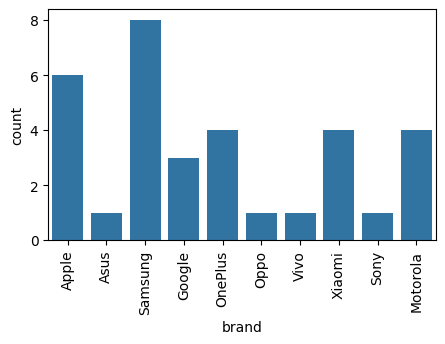

In [12]:
#Menghitung jumlah brand
print('Banyak brand: ',len(data.brand.unique()))
print('Tipe brand: ', data.brand.unique())

#Menghitung jumlah cellphone masing-masing brand
brand_counts = data['brand'].value_counts()
print(brand_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['brand'])
plt.xticks(rotation=90)
plt.show()

Berdasarkan gambar diatas terdapat:
* jumlah brand sebanyak 10
* Samsung adalah brand terbanyak
* Asus, Oppo, Vivo, Sony adalah brand paling sedikit

In [13]:
#Menghitung jumlah model
print('Banyak model: ',len(data.model.unique()))
print('Tipe model: ', data.model.unique())

Banyak model:  33
Tipe model:  ['iPhone SE (2022)' 'iPhone 13 Mini' 'iPhone 13' 'iPhone 13 Pro'
 'iPhone 13 Pro Max' 'iPhone XR' 'Zenfone 8' 'Galaxy A13' 'Galaxy A32'
 'Galaxy A53' 'Galaxy S22' 'Galaxy S22 Plus' 'Galaxy S22 Ultra'
 'Galaxy Z Flip 3' 'Galaxy Z Fold 3' 'Pixel 6 \xa0' 'Pixel 6a'
 'Pixel 6 Pro\xa0' 'Nord N20' 'Nord 2T' '10 Pro' '10T' 'Find X5 Pro'
 'X80 Pro' 'Redmi Note 11' '11T Pro' '12 Pro' 'Poco F4' 'Xperia Pro'
 'Moto G Stylus (2022)' 'Moto G Play (2021)' 'Moto G Pure'
 'Moto G Power (2022)']


Model cellphones ada 33 model

In [15]:
#Menghitung jumlah operating system
os_counts = data['operating system'].value_counts()
print(os_counts)

operating system
Android    27
iOS         6
Name: count, dtype: int64


Terdapat 2 kategori operating system: Android dan iOS

internal memory
128    20
256     6
64      3
32      3
512     1
Name: count, dtype: int64


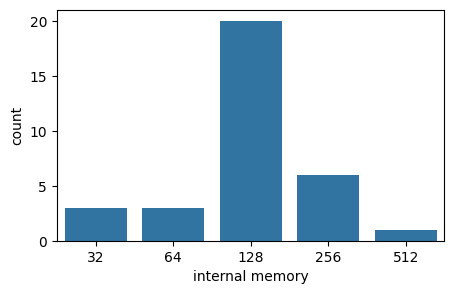

In [16]:
#Menghitung jumlah internal memory
internalMemory_counts = data['internal memory'].value_counts()
print(internalMemory_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['internal memory'])
plt.show()

Berdasarkan gambar diatas terdapat:
* 5 kategori internal memory
* total ada 20 dengan kategori internal memory 128
* hanya ada 1 dengan kategori internal memory 512

RAM
8     13
4      6
6      6
3      4
12     4
Name: count, dtype: int64


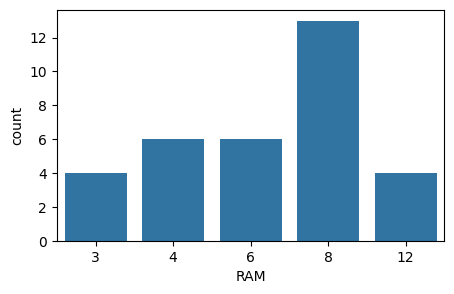

In [17]:
#Menghitung jumlah internal memory
ram_counts = data['RAM'].value_counts()
print(ram_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['RAM'])
plt.show()

Berdasarkan gambar diatas terdapat:
* 5 kategori RAM
* total ada 13 dengan kategori RAM 8GB
* kategori 3GB dan 12GB memiliki jumlah paling sedikit dengan total 4

**Dataset Users**

---




Jumlah kemunculan age:
 age
21     1
23     1
25    12
27     3
28     3
29     5
30     6
31     4
32    10
33     5
34     3
35     3
36     1
37     4
38     5
39     3
40     2
41     2
42     4
43     1
45     1
46     3
48     2
49     2
50     5
55     1
56     2
57     1
58     2
61     2
Name: count, dtype: int64


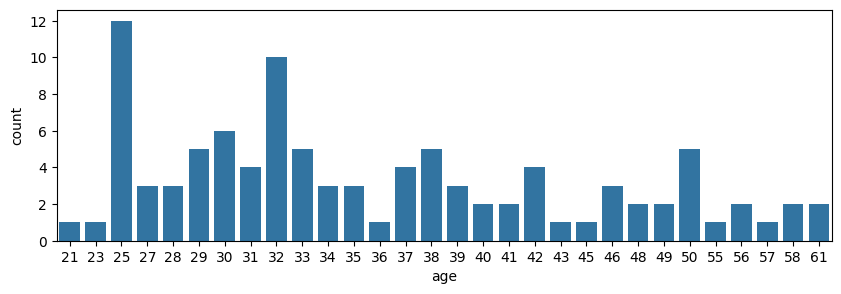

In [18]:
#Menghitung age muncul berapa kali
age_counts = users['age'].value_counts()
print("\nJumlah kemunculan age:\n", age_counts.sort_index())

#Menampilkan grafik
plt.figure(figsize=(10, 3))
sns.countplot(data=users, x=users['age'])
plt.show()

Berdasarkan hasil diatas:
* Umur paling muda adalah 21 tahun
* Umur paling tua adalah 61 tahun


Jumlah kemunculan gender:
 gender
Male               50
Female             46
-Select Gender-     3
Name: count, dtype: int64


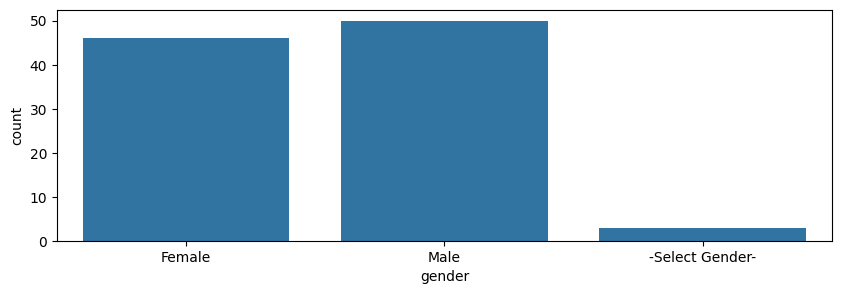

In [19]:
#Menghitung gender muncul berapa kali
gender_counts = users['gender'].value_counts()
print("\nJumlah kemunculan gender:\n", gender_counts)

#Menampilkan grafik
plt.figure(figsize=(10, 3))
sns.countplot(data=users, x=users['gender'])
plt.show()

Berdasarkan hasil diatas:
* Gender Male sebanyak 50
* Gender Female sebanyak 46
* Terdapat outliers yaitu ```-Select Gender-``` sebanyak 3

In [20]:
#Menghitung occupation muncul berapa kali
occupation_counts = users['occupation'].str.lower().value_counts()
print("Jumlah occupation: ", len(occupation_counts))
print("\nJumlah kemunculan occupation:\n", occupation_counts.sort_index())

Jumlah occupation:  45

Jumlah kemunculan occupation:
 occupation
accountant                           2
administrative officer               5
administrator                        1
banking                              1
business                             1
computer technician                  1
construction                         2
data analyst                         2
education                            2
executive                            1
executive manager                    1
finance                              2
healthare                            1
healthcare                           2
homemaker                            1
ict officer                          1
information                          1
information technology              12
it                                   6
manager                             18
marketing                            1
master degree                        1
nurse                                1
ops manager                          

Berdasarkan informasi diatas:
* Jumlah pekerjaan sebanyak 45 jenis pekerjaan
* Terdapat kesalahan pada penulisan ```healthare```
* Pekerjaan ```it``` dan ```information technology``` dapat dijadikan satu

**Dataset Rating**

---



Melihat distribusi rating pada data, gunakan fungsi describe() dengan menerapkan kode berikut:

In [21]:
rating.describe()

,user_id,cellphone_id,rating
count,990.000000,990.000000,990.000000
mean,136.373737,16.421212,6.700000
std,80.664654,9.473466,2.639036
min,0.000000,0.000000,1.000000
25%,74.000000,8.000000,5.000000
50%,128.000000,16.000000,7.000000
75%,226.000000,25.000000,9.000000
max,258.000000,32.000000,18.000000



Jumlah kemunculan per rating:
 rating
1      74
2      44
3      30
4      39
5      68
6     112
7     169
8     195
9     128
10    130
18      1
Name: count, dtype: int64


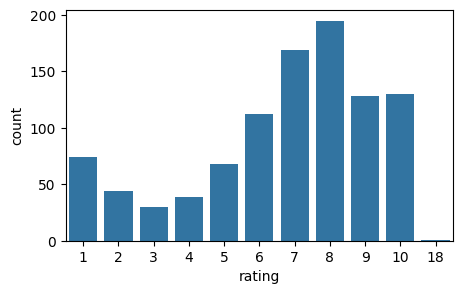

In [22]:
rating_counts = rating['rating'].value_counts()
print("\nJumlah kemunculan per rating:\n", rating_counts.sort_index())

#Menampilkan grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=rating, x=rating['rating'])
plt.show()

Dari output diatas terdapat:
* skala rating 1-10
* rating terendah adalah 1
* rating tertinggi adalah 10
* terdapat nilai outliers yaitu nilai rating 18

In [23]:
print('Jumlah userID: ', len(rating.user_id.unique()))
print('Jumlah cellphonesID: ', len(rating.cellphone_id.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  99
Jumlah cellphonesID:  33
Jumlah data rating:  990


# **Data Preprocessing**

---

Menggabungkan dataset data, rating, dan users menjadi satu.

In [24]:
#Gabungkan cellphones_ratings dengan cellphones_data
rating_data = pd.merge(rating, data, on='cellphone_id', how='left')

#Gabungkan hasil dengan cellphones_users
cellphone = pd.merge(rating_data, users, on='user_id', how='left')

In [25]:
#Menampilkan dataset hasil merged
cellphone.head()

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,Data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,Data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,Data analyst


In [26]:
cellphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           990 non-null    int64  
 1   cellphone_id      990 non-null    int64  
 2   rating            990 non-null    int64  
 3   brand             990 non-null    object 
 4   model             990 non-null    object 
 5   operating system  990 non-null    object 
 6   internal memory   990 non-null    int64  
 7   RAM               990 non-null    int64  
 8   performance       990 non-null    float64
 9   main camera       990 non-null    int64  
 10  selfie camera     990 non-null    int64  
 11  battery size      990 non-null    int64  
 12  screen size       990 non-null    float64
 13  weight            990 non-null    int64  
 14  price             990 non-null    int64  
 15  release date      990 non-null    object 
 16  age               990 non-null    int64  
 1

Hasil output diatas merupakan hasil dari penggabungan dataset data, rating, dan user.

# **Data Preparation**

---



Melakukan pengecekan missing value pada dataset

In [27]:
cellphone.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Berdasarkan output diatas, terdapat 10 missing value pada kolom ```occupation```

Menampilkan baris yang memiliki nilai null

In [28]:
rows_with_null = cellphone[cellphone.isnull().any(axis=1)]
print(rows_with_null)

     user_id  cellphone_id  rating     brand                 model  \
210       53            32       9  Motorola   Moto G Power (2022)   
211       53             5       8     Apple             iPhone XR   
212       53            15      10    Google             Pixel 6     
213       53             4       9     Apple     iPhone 13 Pro Max   
214       53            26       9    Xiaomi                12 Pro   
215       53             9       8   Samsung            Galaxy A53   
216       53             7       8   Samsung            Galaxy A13   
217       53            29       8  Motorola  Moto G Stylus (2022)   
218       53            25       9    Xiaomi               11T Pro   
219       53            17       8    Google          Pixel 6 Pro    

    operating system  internal memory  RAM  performance  main camera  \
210          Android               64    4         1.35           50   
211              iOS               64    3         4.22           12   
212          

Berdasarkan informasi diatas ditemukan saat univariate analysis bahwa terdapat outlier pada kolom gender yaitu ```-Select Gender-``` yang ternyata berhubungan dengan nilai occupation ```NaN```

Menghapus nilai missing value

In [29]:
#Menghapus missing value
cellphone = cellphone.dropna()

Cek kembali data apakah masih terdapat missing value

In [30]:
cellphone.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Sudah tidak ada lagi data missing value

Berdasarkan dari ```Univariate Exploratory Data Analysis``` terdapat ouliers pada kolom ```rating```, terdapat kesalahan penulisan jenis pekerjaan pada kolom ```occupation``` serta menyamakan nama jenis pekerjaan.

In [31]:
#Drop rating 18
cellphone = cellphone[cellphone['rating'] != 18]

#Mengubah seluruh nilai occupation menjadi lowercase
cellphone['occupation'] = cellphone['occupation'].str.lower()

#Mengubah nilai 'healthare' menjadi 'healthcare'
cellphone['occupation'] = cellphone['occupation'].replace('healthare', 'healthcare')

#Mengubah nilai 'it' menjadi 'information technology'
cellphone['occupation'] = cellphone['occupation'].replace('it', 'information technology')

<ipython-input-31-67406d9b36a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellphone['occupation'] = cellphone['occupation'].str.lower()
<ipython-input-31-67406d9b36a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellphone['occupation'] = cellphone['occupation'].replace('healthare', 'healthcare')
<ipython-input-31-67406d9b36a4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [32]:
new_cellphone = cellphone
new_cellphone.sort_values('cellphone_id')

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
575,148,0,10,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022,31,Female,data analyst
819,235,0,10,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022,56,Male,business
35,8,0,5,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022,25,Female,manager
136,30,0,4,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022,34,Male,ict officer
973,257,0,7,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022,25,Female,manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,183,32,7,Motorola,Moto G Power (2022),Android,64,4,1.35,50,8,5000,6.5,203,189,22/02/2022,35,Male,team leader
221,56,32,3,Motorola,Moto G Power (2022),Android,64,4,1.35,50,8,5000,6.5,203,189,22/02/2022,50,Female,manager
687,200,32,8,Motorola,Moto G Power (2022),Android,64,4,1.35,50,8,5000,6.5,203,189,22/02/2022,48,Male,information technology
690,203,32,7,Motorola,Moto G Power (2022),Android,64,4,1.35,50,8,5000,6.5,203,189,22/02/2022,38,Female,information technology


Selanjutnya, menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, perlu menghapus data yang duplikat dengan fungsi ```drop_duplicates()```. Dalam hal ini, kita membuang data duplikat pada kolom ```cellphone_id```.

In [33]:
new_cellphone = new_cellphone.drop_duplicates('cellphone_id')
new_cellphone

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,data analyst
5,0,8,2,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021,38,Female,data analyst
6,0,22,1,Oppo,Find X5 Pro,Android,256,12,10.12,50,32,5000,6.7,218,987,14/03/2022,38,Female,data analyst
7,0,16,2,Google,Pixel 6a,Android,128,6,6.88,12,8,4410,6.1,178,449,21/07/2021,38,Female,data analyst
8,0,19,1,OnePlus,Nord 2T,Android,128,8,6.04,50,32,4500,6.4,190,379,21/05/2022,38,Female,data analyst
9,0,3,10,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021,38,Female,data analyst


Melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi ```tolist()``` dari library numpy

In [34]:
#Melakukan konversi data series menjadi list
cellphone_id = new_cellphone['cellphone_id'].tolist()
brand = new_cellphone['brand'].tolist()
model = new_cellphone['model'].tolist()
operating_system = new_cellphone['operating system'].tolist()

print(len(cellphone_id))
print(len(brand))
print(len(model))
print(len(operating_system))

33
33
33
33


Membuat dictionary untuk menentukan pasangan key-value pada data cellphone_id, brand, model, dan operating system.

TF-IDF hanya cocok untuk data teks maka hanya kolom yang bertipe object saja yang dipilih.

In [35]:
phone_new = pd.DataFrame({
    'cellphone_id': cellphone_id,
    'brand': brand,
    'model': model,
    'operating_system': operating_system,
})

phone_new.head()

,cellphone_id,brand,model,operating_system
0,30,Motorola,Moto G Play (2021),Android
1,5,Apple,iPhone XR,iOS
2,10,Samsung,Galaxy S22,Android
3,9,Samsung,Galaxy A53,Android
4,23,Vivo,X80 Pro,Android


# **Model Development Dengan Content Based Filtering**

---



In [36]:
data = phone_new
data.head()

,cellphone_id,brand,model,operating_system
0,30,Motorola,Moto G Play (2021),Android
1,5,Apple,iPhone XR,iOS
2,10,Samsung,Galaxy S22,Android
3,9,Samsung,Galaxy A53,Android
4,23,Vivo,X80 Pro,Android


**TF-IDF Vectorizer**

Membangun sistem rekomendasi

In [37]:
#Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

#Melakukan perhitungan idf pada data brand
tf.fit(data['brand'])

#Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['apple', 'asus', 'google', 'motorola', 'oneplus', 'oppo',
       'samsung', 'sony', 'vivo', 'xiaomi'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [38]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['brand'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(33, 10)

matriks memiliki ukuran (33, 10). Nilai 33 merupakan ukuran data dan 10 merupakan matrik kategori brand.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks

In [39]:
#Menghasilkan vektor TF-IDF dalam bentuk matriks.
tfidf_matrix.todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],


Melihat matriks TF-IDF untuk beberapa model dan brand.

In [40]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis model
# Baris diisi dengan nama brand

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.model
).sample(10, axis=1).sample(10, axis=0)

,oppo,oneplus,xiaomi,apple,samsung,sony,asus,vivo,motorola,google
model,,,,,,,,,,
iPhone 13 Mini,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
iPhone 13 Pro,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10T,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pixel 6 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Pixel 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Galaxy A32,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10 Pro,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iPhone SE (2022),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy Z Fold 3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Cosine Similarity**

Menghitung derajat kesamaan (similarity degree) dengan teknik cosine similarity.

In [41]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

Melihat matriks kesamaan setiap model dengan menampilkan nama model dalam 33 sampel kolom (axis = 1) dan 10 sampel baris (axis=0)

In [42]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama model
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['model'], columns=data['model'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (33, 33)


model,Redmi Note 11,Pixel 6a,Moto G Play (2021),Moto G Stylus (2022),Find X5 Pro
model,,,,,
iPhone XR,0.0,0.0,0.0,0.0,0.0
Moto G Play (2021),0.0,0.0,1.0,1.0,0.0
iPhone 13 Pro,0.0,0.0,0.0,0.0,0.0
iPhone SE (2022),0.0,0.0,0.0,0.0,0.0
11T Pro,1.0,0.0,0.0,0.0,0.0
Galaxy Z Flip 3,0.0,0.0,0.0,0.0,0.0
Xperia Pro,0.0,0.0,0.0,0.0,0.0
Pixel 6a,0.0,1.0,0.0,0.0,0.0
Find X5 Pro,0.0,0.0,0.0,0.0,1.0


Shape (33, 33) merupakan ukuran matriks similarity. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 33 model x 33 model (masing-masing dalam sumbu X dan Y). Disini hanya memilih 10 model pada baris vertikal dan 5 model pada sumbu horizontal seperti pada contoh di atas.

**Membuat Rekomendasi**

membuat fungsi ```resto_recommendations``` dengan beberapa parameter sebagai berikut:

* ```model``` : Nama model (index kemiripan dataframe).
* ```similarity_data``` : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
* ```items``` : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ```'model'```, ```'brand'``` dan ```'operating_system'```.
* ```k``` : Banyak rekomendasi yang ingin diberikan.

In [43]:
def model_recommendations(model, similarity_data=cosine_sim_df, items=data[['model', 'brand', 'operating_system']], k=5):
        # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,model].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(model, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [44]:
#Menampilkan hasil rekomendasi
model_recommendations('Moto G Play (2021)')

,model,brand,operating_system
0,Moto G Power (2022),Motorola,Android
1,Moto G Pure,Motorola,Android
2,Moto G Stylus (2022),Motorola,Android
3,Xperia Pro,Sony,Android
4,Nord N20,OnePlus,Android


In [45]:
#Menampilkan hasil rekomendasi
model_recommendations('X80 Pro')

,model,brand,operating_system
0,Moto G Pure,Motorola,Android
1,iPhone 13,Apple,iOS
2,Galaxy A13,Samsung,Android
3,Pixel 6,Google,Android
4,Xperia Pro,Sony,Android


# **Model Development dengan Collaborative Filtering**

---



Model Development dengan Collaborative Filtering menghasilkan rekomendasi sejumlah model yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya.  

**Data Understanding**

membaca dataset rating

In [46]:
df = rating
df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


data rating memiliki 990 baris dan 3 kolom

**Data Preparation**

melakukan persiapan data untuk menyandikan (encode) fitur ```'user_id'``` dan ```'cellphone_id'``` ke dalam indeks integer.

In [47]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [0, 1, 6, 8, 10, 12, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 52, 53, 56, 60, 74, 79, 80, 84, 85, 91, 95, 98, 99, 100, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 128, 129, 137, 140, 142, 143, 144, 145, 148, 152, 154, 156, 160, 162, 164, 169, 178, 183, 194, 200, 203, 204, 208, 211, 215, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 256, 257, 258]
encoded userID :  {0: 0, 1: 1, 6: 2, 8: 3, 10: 4, 12: 5, 16: 6, 24: 7, 25: 8, 26: 9, 27: 10, 28: 11, 29: 12, 30: 13, 32: 14, 33: 15, 35: 16, 36: 17, 37: 18, 38: 19, 52: 20, 53: 21, 56: 22, 60: 23, 74: 24, 79: 25, 80: 26, 84: 27, 85: 28, 91: 29, 95: 30, 98: 31, 99: 32, 100: 33, 104: 34, 105: 35, 106: 36, 110: 37, 111: 38, 112: 39, 113: 40, 114: 41, 115: 42, 116: 43, 119: 44, 120: 45, 123: 46, 124: 47, 126: 48, 128: 49, 129: 50, 137: 51, 140: 52, 142: 53, 143: 54, 144: 55, 145: 56, 148: 57, 152: 58, 154: 59, 156: 60, 160: 6

In [48]:
#Mengubah cellphone_id menjadi list tanpa nilai yang sama
cellphone_ids = df['cellphone_id'].unique().tolist()

#Melakukan proses encoding cellphone_id
cellphone_to_cellphone_encoded = {x: i for i, x in enumerate(cellphone_ids)}

#Melakukan proses encoding angka ke cellphone_id
cellphone_encoded_to_cellphone = {i: x for i, x in enumerate(cellphone_ids)}

Berikutnya, petakan userID dan cellphoneID ke dataframe yang berkaitan

In [49]:
# Mapping userID ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['cellphone'] = df['cellphone_id'].map(cellphone_to_cellphone_encoded)

Cek beberapa hal dalam data seperti jumlah user, jumlah cellphone, dan mengubah nilai rating menjadi float.

In [50]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah cellphone
num_cellphone = len(cellphone_encoded_to_cellphone)
print(num_cellphone)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of cellphone: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_cellphone, min_rating, max_rating
))

99
33
Number of User: 99, Number of cellphone: 33, Min Rating: 1.0, Max Rating: 18.0


Output kode di atas memberikan informasi :

* Jumlah user 99
* Jumlah cellphone 33
* min rating: 1, max rating: 18
* Terdapat outliers pada fitur rating yaitu value '18'

Menghapus data outliers

In [51]:
#Drop data
df = df[df['rating'] != 18]

Mengecek kembali nilai minimal dan maksimal rating

In [52]:
#Nilai minimum rating
min_rating = min(df['rating'])

#Nilai maksimal rating
max_rating = max(df['rating'])

print('Min Rating: {}, Max Rating: {}'.format(
    min_rating, max_rating
))

Min Rating: 1.0, Max Rating: 10.0


Rating sudah sesuai

**Membagi data untuk Training dan Validasi**

In [53]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,cellphone_id,rating,user,cellphone
213,53,4,9.0,21,16
331,100,27,9.0,33,19
501,129,4,8.0,50,16
309,95,5,5.0,30,1
88,25,16,9.0,8,7
...,...,...,...,...,...
106,27,6,8.0,10,27
270,84,25,1.0,27,21
860,242,24,4.0,86,30
435,116,13,1.0,43,17


Membagi data train dan validasi dengan komposisi 80:20. Kemudian memetakan (mapping) data user dan cellphone menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [54]:
# Membuat variabel x untuk mencocokkan data user dan cellphone menjadi satu value
x = df[['user', 'cellphone']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[21 16]
 [33 19]
 [50 16]
 ...
 [86 30]
 [43 17]
 [10  8]] [0.88888889 0.88888889 0.77777778 0.44444444 0.88888889 0.66666667
 0.         0.88888889 0.55555556 0.66666667 1.         0.22222222
 0.88888889 1.         0.66666667 0.88888889 0.55555556 0.66666667
 0.77777778 0.77777778 0.44444444 0.11111111 0.66666667 0.55555556
 0.66666667 0.22222222 0.55555556 0.55555556 0.77777778 0.55555556
 0.11111111 0.77777778 0.77777778 0.88888889 0.44444444 0.55555556
 0.22222222 0.66666667 0.33333333 0.88888889 0.66666667 0.11111111
 0.55555556 0.77777778 0.77777778 0.55555556 0.88888889 0.88888889
 0.66666667 0.88888889 0.44444444 1.         1.         0.55555556
 0.55555556 0.77777778 0.55555556 0.66666667 0.44444444 0.88888889
 0.33333333 0.77777778 0.66666667 0.         0.33333333 0.77777778
 0.77777778 0.77777778 0.55555556 0.44444444 0.66666667 0.66666667
 0.44444444 0.66666667 1.         0.66666667 1.         0.88888889
 0.66666667 1.         0.88888889 0.88888889 0.11111111 0.77777778
 0

# **Proses Training**

---



Membuat class ```RecommenderNet``` dengan keras Model class.

In [58]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_cellphone, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_cellphone = num_cellphone
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.cellphone_embedding = layers.Embedding( # layer embeddings cellphone
        num_cellphone,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.cellphone_bias = layers.Embedding(num_cellphone, 1) # layer embedding cellphone bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    cellphone_vector = self.cellphone_embedding(inputs[:, 1]) # memanggil layer embedding 3
    cellphone_bias = self.cellphone_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_cellphone = tf.tensordot(user_vector, cellphone_vector, 2)

    x = dot_user_cellphone + user_bias + cellphone_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Melakukan proses compile terhadap model.

In [59]:
model = RecommenderNet(num_users, num_cellphone, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

Memulai proses training

In [60]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7504 - root_mean_squared_error: 0.3510 - val_loss: 0.7350 - val_root_mean_squared_error: 0.3401
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7069 - root_mean_squared_error: 0.3198 - val_loss: 0.7299 - val_root_mean_squared_error: 0.3369
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7074 - root_mean_squared_error: 0.3270 - val_loss: 0.7242 - val_root_mean_squared_error: 0.3334
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7109 - root_mean_squared_error: 0.3257 - val_loss: 0.7219 - val_root_mean_squared_error: 0.3319
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6836 - root_mean_squared_error: 0.3109 - val_loss: 0.7201 - val_root_mean_squared_error: 0.3307
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6901 - root_mean_squared_error: 0.3093 - val_loss: 0.7198 - val_root_mean_squared_error: 0.3304
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

**Visualisasi Metrik**

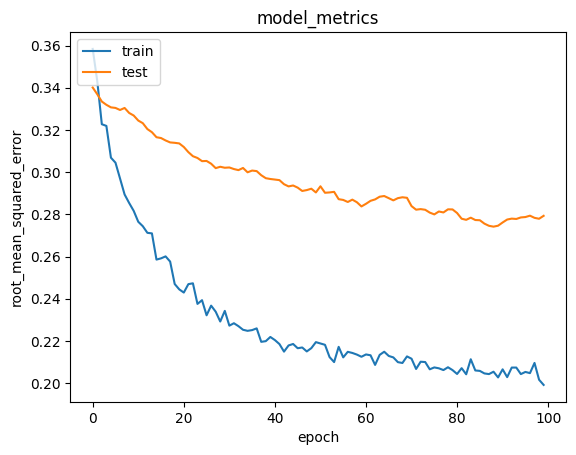

In [61]:
#Menampilkan grafik traning vs test
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

RMSE yang dihitung memberikan indikasi bahwa model prediksi rating memiliki tingkat kesalahan yang dapat diterima, sehingga memadai untuk tujuan rekomendasi.

**Mendapatkan Rekomendasi Cellphone**

In [62]:
phone_df = phone_new
df = pd.read_csv('rating.csv')

#Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
cellphone_reviewed_by_user = df[df.user_id == user_id]

cellphone_not_reviewed = phone_df[~phone_df['cellphone_id'].isin(cellphone_reviewed_by_user.cellphone_id.values)]['cellphone_id']
cellphone_not_reviewed = list(
    set(cellphone_not_reviewed)
    .intersection(set(cellphone_to_cellphone_encoded.keys()))
)

cellphone_not_reviewed = [[cellphone_to_cellphone_encoded.get(x)] for x in cellphone_not_reviewed]
user_encoder = user_to_user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_reviewed), cellphone_not_reviewed)
)

Memperoleh hasil rekomendasi cellphone

In [63]:
ratings = model.predict(user_cellphone_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_cellphone_ids = [
    cellphone_encoded_to_cellphone.get(cellphone_not_reviewed[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('cellphone with high ratings from user')
print('----' * 8)

top_cellphone_user = (
    cellphone_reviewed_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .cellphone_id.values
)

cellphone_df_rows = phone_df[phone_df['cellphone_id'].isin(top_cellphone_user)]
for row in cellphone_df_rows.itertuples():
    print(row.brand, ':', row.model)

print('----' * 8)
print('Top 10 cellphone recommendation')
print('----' * 8)

recommended_cellphone = phone_df[phone_df['cellphone_id'].isin(recommended_cellphone_ids)]
for row in recommended_cellphone.itertuples():
    print(row.brand, ':', row.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Showing recommendations for users: 128
cellphone with high ratings from user
--------------------------------
Vivo : X80 Pro
Samsung : Galaxy A32
Apple : iPhone 13 Pro Max
Samsung : Galaxy Z Fold 3
Xiaomi : Redmi Note 11
--------------------------------
Top 10 cellphone recommendation
--------------------------------
Apple : iPhone XR
Samsung : Galaxy S22
Oppo : Find X5 Pro
Apple : iPhone 13 Pro
Apple : iPhone 13 Mini
Xiaomi : 11T Pro
OnePlus : 10 Pro
Apple : iPhone SE (2022)
Google : Pixel 6 Pro 
Apple : iPhone 13
